In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Directory Setup ---
base_dir = '/kaggle/input/pets-facial-expression-dataset/Master Folder'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir  = os.path.join(base_dir, 'test')

# --- Parameters ---
img_size = (224, 224)
batch_size = 16
num_classes = 4

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    channel_shift_range=20,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=True
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)



2025-05-22 14:18:19.158938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747923499.335731      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747923499.391520      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# --- VGG19 Architecture with Light Regularization ---
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Fully Connected
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(1e-4)))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747923514.385202      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1747923527.014243      78 service.cc:148] XLA service 0x3bae2770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747923527.015302      78 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747923528.142075      78 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/63 ━━━━━━━━━━━━━━━━━━━━ 27:36 27s/step - accuracy: 0.3125 - loss: 4.2916

I0000 00:00:1747923543.425284      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 655ms/step - accuracy: 0.2733 - loss: 5.0826 - val_accuracy: 0.2500 - val_loss: 183.3858
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.2972 - loss: 4.1151 - val_accuracy: 0.1667 - val_loss: 11.7872
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - accuracy: 0.2881 - loss: 3.5288 - val_accuracy: 0.2222 - val_loss: 3.7374
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.3115 - loss: 3.2662 - val_accuracy: 0.1667 - val_loss: 3.3347
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.3192 - loss: 3.2437 - val_accuracy: 0.3611 - val_loss: 3.0167
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.3055 - loss: 3.2061 - val_accuracy: 0.3889 - val_loss: 3.0255
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.3660 - loss: 3.0834 - val_accuracy: 0.5000 - val_loss: 2.9217
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.3778 - loss: 3.0617 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.3483 - loss: 3.0318

Test Accuracy: 0.3684


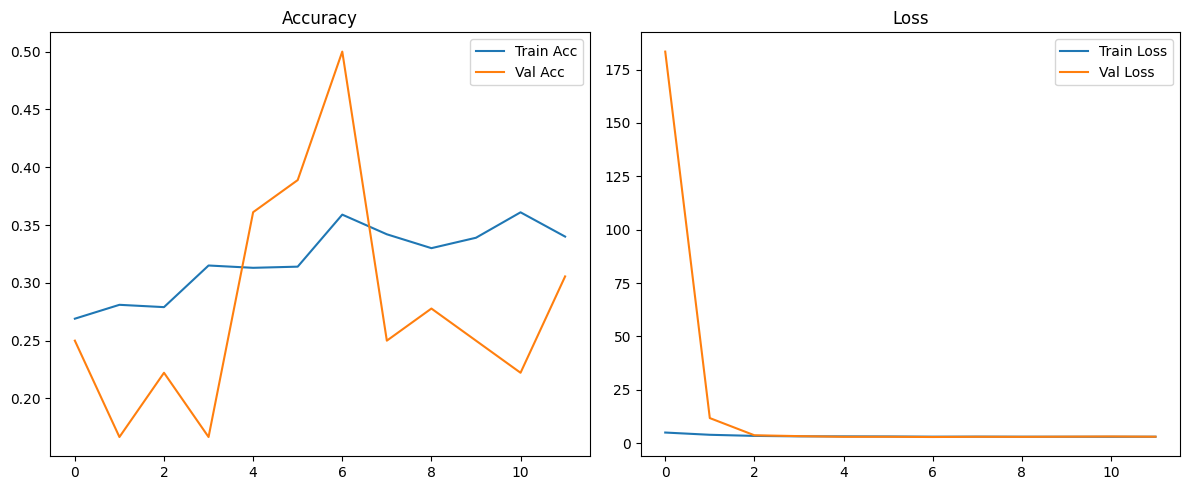

In [3]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")

# --- Plot History ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()



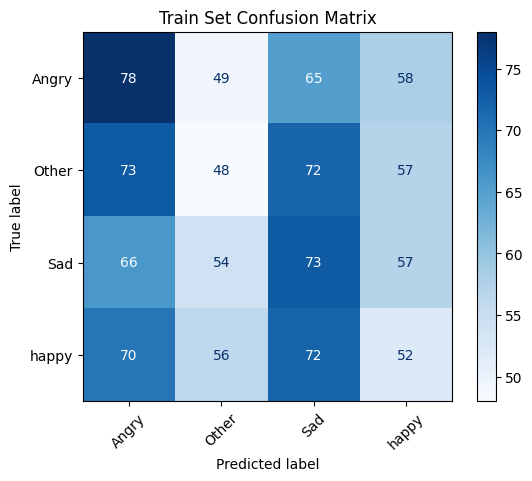

Classification Report - Train Set
              precision    recall  f1-score   support

       Angry     0.2718    0.3120    0.2905       250
       Other     0.2319    0.1920    0.2101       250
         Sad     0.2589    0.2920    0.2744       250
       happy     0.2321    0.2080    0.2194       250

    accuracy                         0.2510      1000
   macro avg     0.2487    0.2510    0.2486      1000
weighted avg     0.2487    0.2510    0.2486      1000



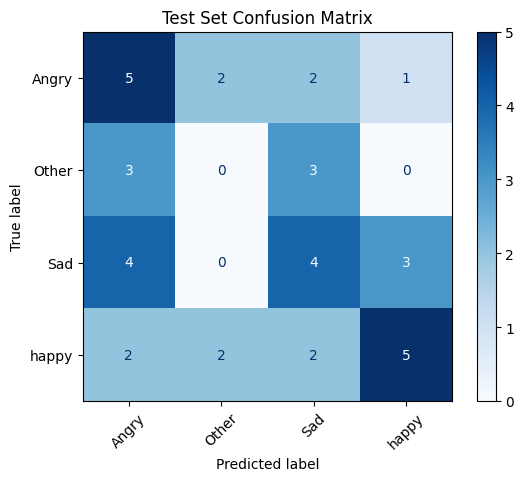

Classification Report - Test Set
              precision    recall  f1-score   support

       Angry     0.3571    0.5000    0.4167        10
       Other     0.0000    0.0000    0.0000         6
         Sad     0.3636    0.3636    0.3636        11
       happy     0.5556    0.4545    0.5000        11

    accuracy                         0.3684        38
   macro avg     0.3191    0.3295    0.3201        38
weighted avg     0.3601    0.3684    0.3596        38



In [4]:
# --- Confusion Matrix & Report ---
def evaluate_generator(gen, title):
    gen.reset()
    y_pred_probs = model.predict(gen, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = gen.classes
    class_names = list(gen.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{title} Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

    print(f"Classification Report - {title}")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

evaluate_generator(train_generator, "Train Set")
evaluate_generator(test_generator, "Test Set")


# VGG-19 Model

## 📌 Overview

**VGG-19** is a deep convolutional neural network architecture proposed by the Visual Geometry Group (VGG) at the University of Oxford. It was introduced in the 2014 paper:

VGG-19 is an extension of the VGG-16 architecture and consists of **19 layers** (16 convolutional + 3 fully connected). It is known for its **simplicity** and **uniform architecture** using only 3×3 convolution filters throughout the network.

---

## 🧠 Architecture Highlights

- **Total Layers**: 19 (16 convolutional + 3 fully connected)
- **Convolutional Kernel Size**: All convolutions use 3×3 filters with stride 1 and padding 1
- **Pooling**: 5 MaxPooling layers (2×2, stride 2) for downsampling
- **Activation**: ReLU after each convolution
- **Fully Connected**: 2 dense layers with 4096 neurons each, followed by a final softmax layer

---

## ✅ Key Advantages

- **Simplicity**: The use of uniform 3×3 convolutions makes the architecture easy to understand and implement.
- **Depth**: The 19-layer structure allows for better learning of complex patterns than shallower networks.
- **Strong Baseline**: Still widely used as a strong baseline for many computer vision tasks.
- **Good for Transfer Learning**: Pretrained VGG-19 on ImageNet transfers well to other vision tasks.

---

## ⚖️ Comparison With Other Models

| Feature             | VGG-19      | InceptionV3 | ResNet-50   |
|---------------------|-------------|-------------|-------------|
| Parameters          | ❌ Very High (~143M) | Moderate (~23M) | Moderate (~25M) |
| Computation Cost    | ❌ High     | ✅ Optimized | ✅ Efficient |
| Simplicity          | ✅ Simple   | ❌ Complex  | Moderate     |
| Transfer Learning   | ✅ Strong   | ✅ Strong   | ✅ Strong     |

---

## ⚠️ Disadvantages

- **Large Model Size**: VGG-19 has **over 140 million parameters**, making it very heavy for deployment on resource-constrained systems.
- **Slow Inference and Training**: The depth and fully connected layers make it computationally expensive.
- **Overfitting Risk**: Without regularization, the large number of parameters increases the risk of overfitting on small datasets.

---

## 📊 Use Cases

- Image classification tasks (e.g., ImageNet)
- Feature extraction in custom pipelines
- Fine-tuning for tasks like object detection, facial recognition, and medical imaging

